In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import interpolate

In [22]:
fname='player_attributes.csv'
pl=pd.read_csv(fname)
pl['Attack']=pl.loc[:,['Crossing','Finishing','Heading Accuracy','Short Passing','Volleys']].mean(1)
pl['Skill']=pl.loc[:,['Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control']].mean(1)
pl['Movement']=pl.loc[:,['Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance']].mean(1)
pl['Power']=pl.loc[:,['Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots']].mean(1)
pl['Defending']=pl.loc[:,['Marking', 'Standing Tackle', 'Sliding Tackle']].mean(1)
pl['Goalkeeping']=pl.loc[:,[ 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']].mean(1)
pl['Attacking+Skill']=pl.loc[:,['Attacking','Skill']].mean(1)
ph=pl['Height'].tolist()
ph=[i.strip('""').split('\'') for i in ph]
ph=np.array([(int(i[0])*12+int(i[1]))*2.54/100 for i in ph])
pl['H/m']=ph
pw=pl['Weight'].values*0.4535924
BMI=pw/ph**2
pl['BMI']=BMI

C:\Users\z\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [23]:
plp=pl.groupby('Player Category')
sp=plp.get_group('Striker')
gp=plp.get_group('GoalKeeper')
mp=plp.get_group('Midfielder')
dp=plp.get_group('Defender')
sp['Mentality']=sp.loc[:,['Aggression', 'Positioning', 'Vision', 'Penalties', 'Composure']].mean(1)
dp['Mentality']=dp.loc[:,['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Composure']].mean(1)
mp['Mentality']=mp.loc[:,['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure']].mean(1)
gp['Mentality']=gp.loc[:,['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure']].mean(1)
op=pd.concat([sp,mp,dp])

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [24]:
opH=op.groupby('H/m').mean()
opW=op.groupby('Weight').mean()
opB=op.groupby('BMI').mean()
gpH=gp.groupby('H/m').mean()
gpW=gp.groupby('Weight').mean()
gpB=gp.groupby('BMI').mean()

In [49]:
x=[opH,opW,opB]
def pt(item):
    for i in range(3):
        x1=x[i].index.values
        xnew=np.linspace(min(x1),max(x1),100)
        y1=x[i][item].values
        func = interpolate.interp1d(x1,y1,kind='cubic')
        ynew=func(xnew)
        #plt.plot(xnew,ynew,'b--')
        #plt.fill_between(xnew,ynew,0, facecolor='steelblue', alpha=0.3)
        plt.plot(x1,y1,'b--')
        plt.fill_between(x1,y1,min(y1)-10, facecolor='steelblue', alpha=0.3)
        plt.xlabel(x[i].index.name)    
        plt.ylabel(item)
        plt.title(item +' vs '+x[i].index.name)    
        plt.grid(True)
        plt.show()



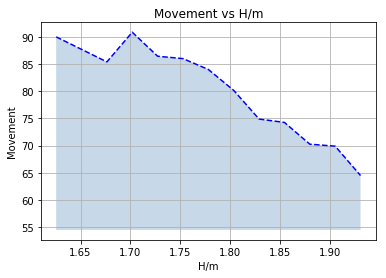

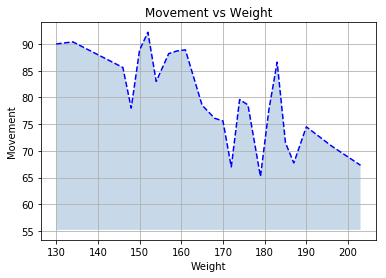

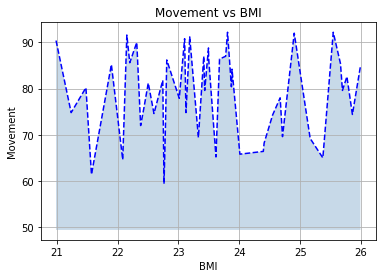

In [50]:
pt('Movement')

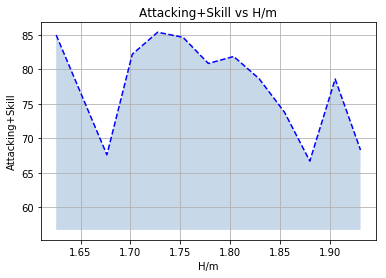

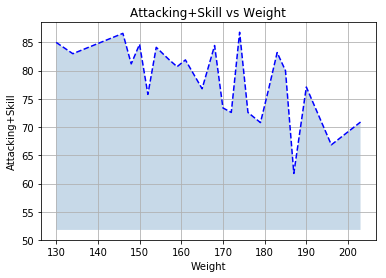

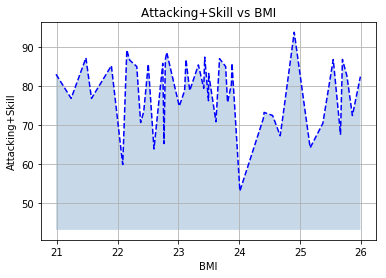

In [51]:
pt('Attacking+Skill')

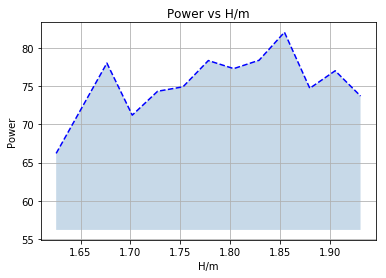

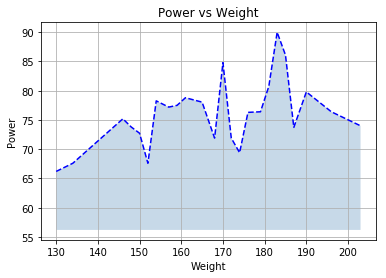

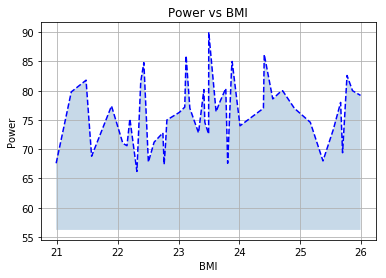

In [52]:
pt('Power')

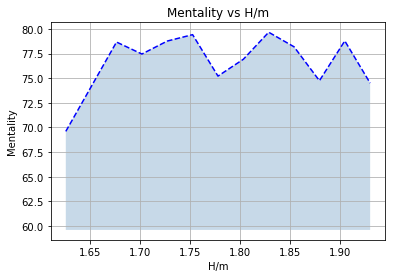

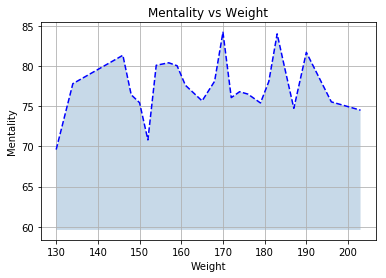

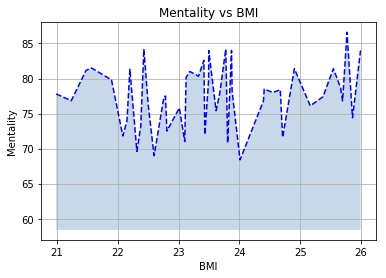

In [53]:
pt('Mentality')

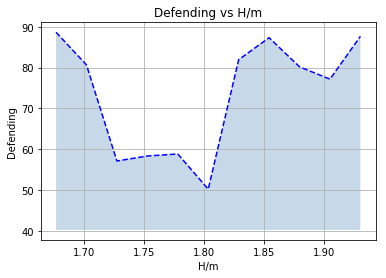

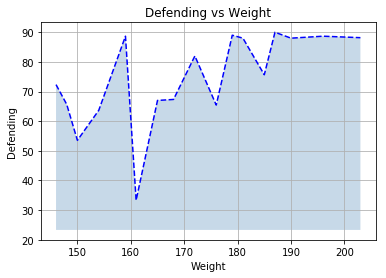

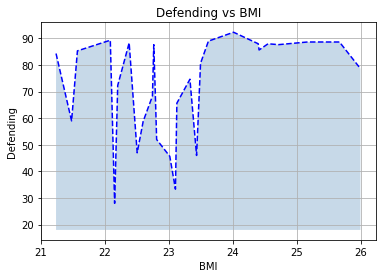

In [56]:
oop=pd.concat([mp,dp])
oopH=oop.groupby('H/m').mean()
oopW=oop.groupby('Weight').mean()
oopB=oop.groupby('BMI').mean()
x=[oopH,oopW,oopB]
pt('Defending')

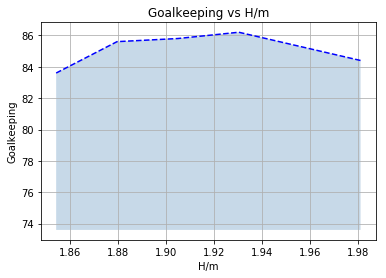

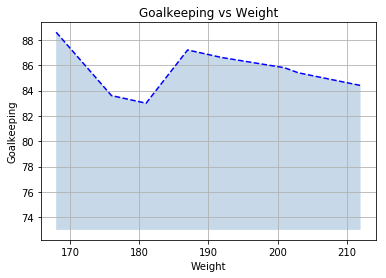

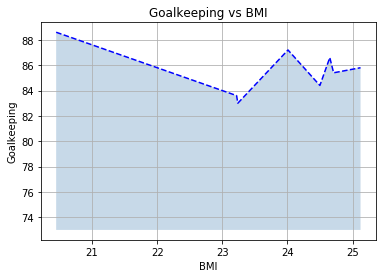

In [58]:
x=[gpH,gpW,gpB]
pt('Goalkeeping')